In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import math

In [5]:
df1 = pd.read_csv("boston_house_prices.csv")
df1.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [7]:
df1.isna().sum().sum()

0

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
x = df1.drop('CHAS',axis=1)
y = df1['CHAS']

In [12]:
x

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [14]:
df1.value_counts(['CHAS'])

CHAS
0       471
1        35
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=50)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(x_test)

In [24]:
print("Intercept ",int(model.intercept_))
print("Coeffecient ",model.coef_)


Intercept  0
Coeffecient  [-1.07941357e-03 -1.23067311e-04  5.31172764e-03  2.97138109e-01
 -3.02801414e-02  6.37395433e-04  6.51167780e-03  4.44830056e-03
 -4.17753715e-04 -1.16495385e-02  6.36131360e-05  1.53629815e-03
  4.43662348e-03]


In [25]:
y_pred_int = y_pred.astype(int)

In [27]:
pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_int})

,Actual Value,Predicted Value
365,0,0
313,0,0
461,0,0
158,0,0
333,0,0
...,...,...
203,0,0
423,0,0
9,0,0
18,0,0


In [28]:
accuracy_score(y_test,y_pred_int)

0.8947368421052632

In [29]:
r2_score(y_test,y_pred_int)

-0.11764705882352944

In [31]:
cm = confusion_matrix(y_test,y_pred_int)
cm

array([[136,   0],
       [ 16,   0]], dtype=int64)

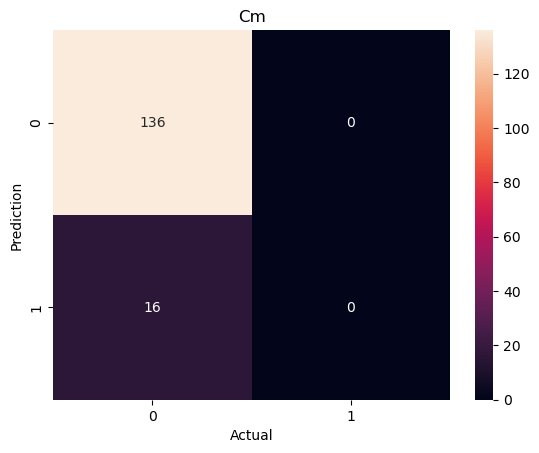

In [34]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['0','1'],yticklabels=['0','1'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Cm')
plt.show()